In [1323]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OrdinalEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1324]:
data_path = "./data/scraped1.csv"
df = pd.read_csv(data_path)
df.head(50)

,id,url,url_full,name,price,item_condition,shipping,located_in,last_price,us_price,return_policy,description_url,category,authenticity,money_back,seller_positive_feedback,seller_feedback_comments,seller_item_sold,seller_all_feedback_url,trending,stock,watchers
0,1,https://www.ebay.ca/itm/185389821883,https://www.ebay.ca/itm/185389821883,"Nike Dunk Low Retro ""White Black Panda"" Shoes ...",C $133.10,New with box,C $40.33,NaN,NaN,US $99.00,This item is final sale and cannot be return...,https://vi.vipr.ebaydesc.com/ws/eBayISAPI.dll?...,"Clothing, Shoes & Accessories/Men/Men's Shoes/...",Yes,Yes,99.3% positive feedback,"[""Love them ! Tysm ! "", ""Exactly as described""...",32K,https://www.ebay.ca/fdbk/feedback_profile/riot...,Yes/373,2 available/373 sold,NaN
1,10,https://www.ebay.ca/itm/275821103916,https://www.ebay.ca/itm/275821103916,Rolex Daytona Cosmograph Auto 40mm Yellow Gold...,"C $51,021.85",Used,C $100.83,NaN,NaN,"US $37,950.00",14 days return . Seller pays for return shipp...,https://vi.vipr.ebaydesc.com/ws/eBayISAPI.dll?...,"Clothing, Shoes & Accessories/Jewelry & Watche...",NaN,Yes,100% positive feedback,"[""Excellent communication and delivery"", ""Exac...",17K,https://www.ebay.ca/fdbk/feedback_profile/watc...,No,NaN,NaN
2,13,https://www.ebay.ca/itm/110810977619,https://www.ebay.ca/itm/110810977619,Women's Casual Comfort Mid Calf Knee High Roun...,C $35.33,New without box,"Lcted in: Suth Sn Fncisc, Clifni, United Sttes","South San Francisco, California, United States",US $30.99,US $26.34,No returns accepted .,https://vi.vipr.ebaydesc.com/ws/eBayISAPI.dll?...,"Clothing, Shoes & Accessories/Women/Women's Sh...",NaN,Yes,98.7% positive feedback,"[""Had to return them because of ambiguous adve...",326K,NaN,Yes/8,"8 available/8,602 sold",NaN
3,14,https://www.ebay.ca/itm/111064770634,https://www.ebay.ca/itm/111064770634,G-Unit Style heavy weigh Tank Top Square Cut ...,C $16.03,New with tags,NaN,"Desoto, Texas, United States",NaN,US $11.95,No returns accepted .,https://vi.vipr.ebaydesc.com/ws/eBayISAPI.dll?...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",NaN,Yes,97.6% positive feedback,"[""Excellent seller "", ""Great product, thanks!!...",207K,NaN,Yes/5,"More than 10 available/5,531 sold",NaN
4,15,https://www.ebay.ca/itm/111206598777,https://www.ebay.ca/itm/111206598777,Men's 100% Cotton Big Polka Dot Design Spread...,C $29.44,New with tags,C $7.36,"Ridgewood, New York, United States",NaN,US $21.95,30 days return . Buyer pays for return shippi...,https://vi.vipr.ebaydesc.com/ws/eBayISAPI.dll?...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",NaN,Yes,99.5% positive feedback,"[""Easy transaction. Thanks"", ""Awesome that's w...",48K,NaN,Yes/54,Last One/54 sold,NaN
5,16,https://www.ebay.ca/itm/111290912346,https://www.ebay.ca/itm/111290912346,CALTOP OLD SCHOOL FLANNEL VETERANO SHORTSLEEVE...,C $63.03,New with tags,"Lcted in: Cn, Clifni, United Sttes","Corona, California, United States",NaN,US $46.99,30 days return . Buyer pays for return shippi...,https://vi.vipr.ebaydesc.com/ws/eBayISAPI.dll?...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",NaN,Yes,99.3% positive feedback,"[""Good seller, trustable, very recommended."", ...",103K,https://www.ebay.ca/fdbk/feedback_profile/sout...,Yes/252,2 available/252 sold,NaN
6,17,https://www.ebay.ca/itm/111648799622,https://www.ebay.ca/itm/111648799622,[NEW] Women's Sandals Fashion Wedge Platform F...,C $18.76,New with box,"Lcted in: Whittie, Clifni, United Sttes","Whittier, California, United States",NaN,US $13.99,30 days return . Buyer pays for return shippi...,https://vi.vipr.ebaydesc.com/ws/eBayISAPI.dll?...,"Clothing, Shoes & Accessories/Women/Women's Sh...",NaN,Yes,99.1% positive feedback,"[""I'm so happy I was able to find another pear...",181K,NaN,Yes/10,"6 available/10,598 sold",NaN
7,18,https://www.ebay.ca/itm/111718536349,https://www.ebay.ca/itm/111718536349,Fitted Ruffle Steampunk Waistcoat Military Ves...,C $40.22,New with tags,C $10.72,"Chino Hills, Califo

In [1325]:
irrelevant_cols = ["id", "url", "url_full", "us_price", "seller_all_feedback_url", "description_url"]
df.drop(irrelevant_cols, axis=1, inplace=True)

In [1326]:
print(df["shipping"].str.contains('Fee').sum())
print(df["shipping"].str.contains('Lcted').sum())

2023
867


In [1327]:
null_vals = df.isna().sum()
null_vals

name                           2
price                          2
item_condition                 2
shipping                    1195
located_in                    78
last_price                  7422
return_policy                  2
category                      14
authenticity                9283
money_back                     0
seller_positive_feedback      36
seller_feedback_comments       0
seller_item_sold              62
trending                       0
stock                       3756
watchers                    8294
dtype: int64

In [1328]:
df.shape[0]

9404

## Insights

- 7422 rows are null in last_price column describes that not much items are on sale from our dataset
- 9283 null rows in authenticity out of 9404 items, only 121 items are authenticity guaranteed


## Dealing with missing values

- For this moment, we will drop the columns with high missing values
- But how do we deal with the comparatively less numbers of missing values like shipping
- We cannot assume/predict weather an item will be shipped or not based on shipping values in other items
- Let's see if there is a pattern to this missing values or are they missing at random.


name                           2
price                          2
item_condition                 2
shipping                    1195
located_in                    78
last_price                  7422
return_policy                  2
category                      14
authenticity                9283
money_back                     0
seller_positive_feedback      36
seller_feedback_comments       0
seller_item_sold              62
trending                       0
stock                       3756
watchers                    8294
dtype: int64


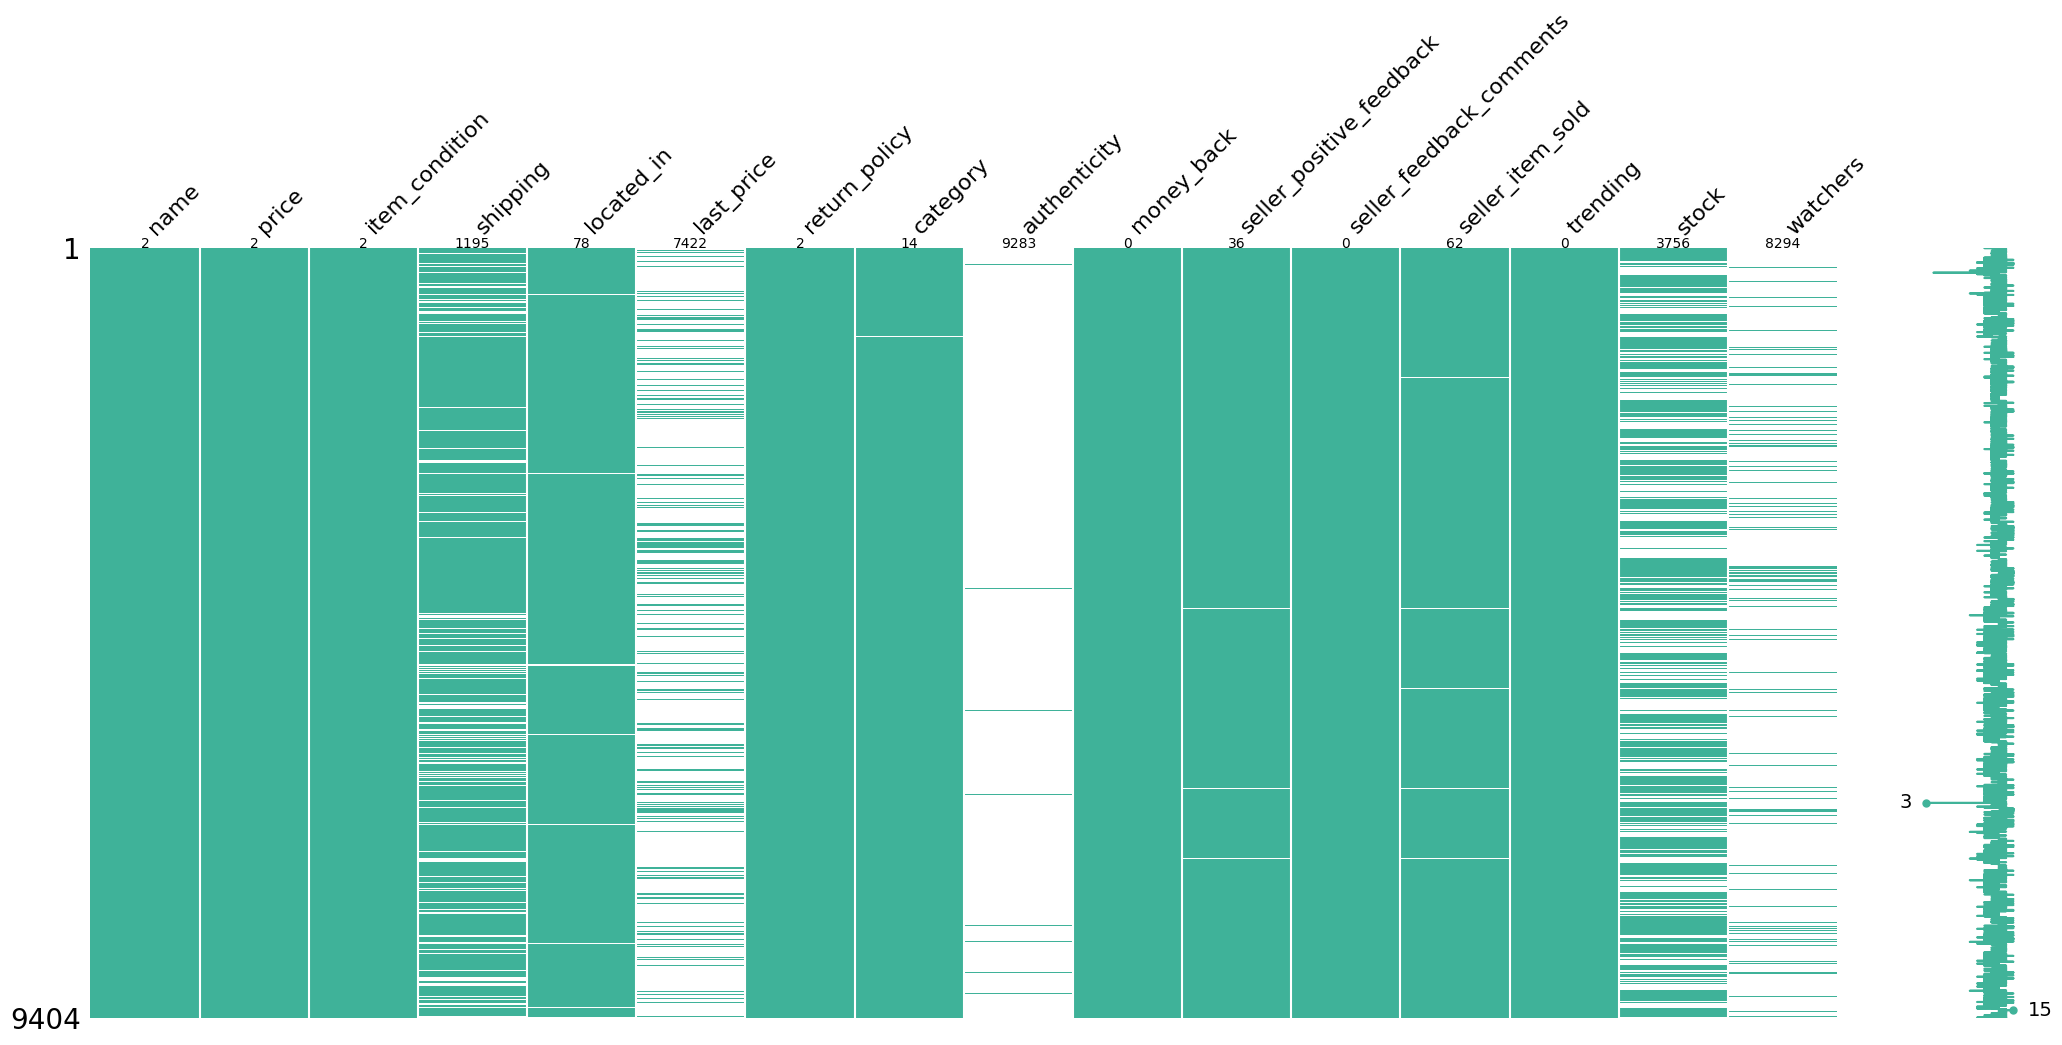

In [1329]:
msno.matrix(df, color=(0.25, 0.70, 0.6))

for i, cnt in enumerate(null_vals):
    plt.text(i, -0.5, cnt, ha='center', va='baseline', rotation=0)
print(null_vals)
plt.show()

<Axes: >

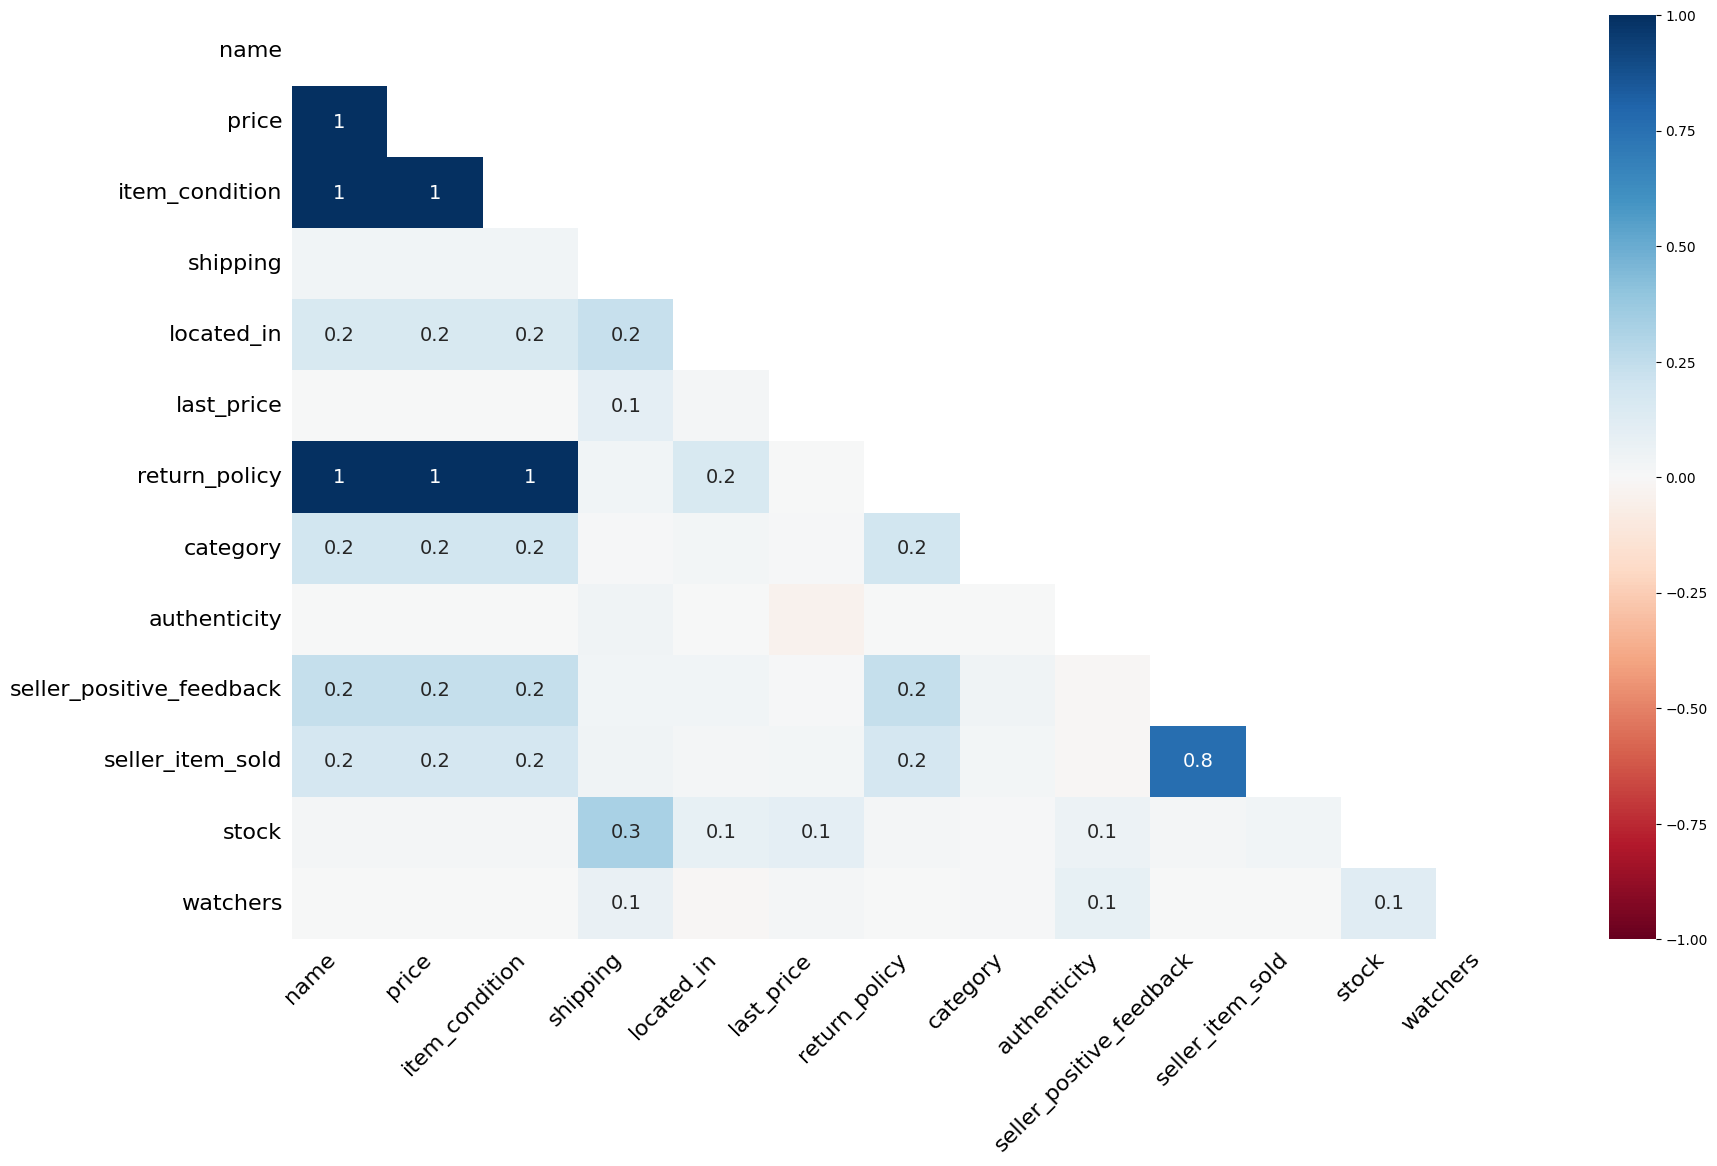

In [1330]:
msno.heatmap(df)

In [1331]:
drop_fields = ["authenticity", "last_price", "watchers", "stock"]
df.drop(drop_fields, axis=1, inplace=True)
df.head()

,name,price,item_condition,shipping,located_in,return_policy,category,money_back,seller_positive_feedback,seller_feedback_comments,seller_item_sold,trending
0,"Nike Dunk Low Retro ""White Black Panda"" Shoes ...",C $133.10,New with box,C $40.33,NaN,This item is final sale and cannot be return...,"Clothing, Shoes & Accessories/Men/Men's Shoes/...",Yes,99.3% positive feedback,"[""Love them ! Tysm ! "", ""Exactly as described""...",32K,Yes/373
1,Rolex Daytona Cosmograph Auto 40mm Yellow Gold...,"C $51,021.85",Used,C $100.83,NaN,14 days return . Seller pays for return shipp...,"Clothing, Shoes & Accessories/Jewelry & Watche...",Yes,100% positive feedback,"[""Excellent communication and delivery"", ""Exac...",17K,No
2,Women's Casual Comfort Mid Calf Knee High Roun...,C $35.33,New without box,"Lcted in: Suth Sn Fncisc, Clifni, United Sttes","South San Francisco, California, United States",No returns accepted .,"Clothing, Shoes & Accessories/Women/Women's Sh...",Yes,98.7% positive feedback,"[""Had to return them because of ambiguous adve...",326K,Yes/8
3,G-Unit Style heavy weigh Tank Top Square Cut ...,C $16.03,New with tags,NaN,"Desoto, Texas, United States",No returns accepted .,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,97.6% positive feedback,"[""Excellent seller "", ""Great product, thanks!!...",207K,Yes/5
4,Men's 100% Cotton Big Polka Dot Design Spread...,C $29.44,New with tags,C $7.36,"Ridgewood, New York, United States",30 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,99.5% positive feedback,"[""Easy transaction. Thanks"", ""Awesome that's w...",48K,Yes/54


# Pre processing stuffs

In [1332]:
df.loc[~df['shipping'].astype(str).str.contains('\$'), 'shipping'] = 0
df.loc[df['shipping'].astype(str).str.contains('\$'), 'shipping'] = 1
df.head()

,name,price,item_condition,shipping,located_in,return_policy,category,money_back,seller_positive_feedback,seller_feedback_comments,seller_item_sold,trending
0,"Nike Dunk Low Retro ""White Black Panda"" Shoes ...",C $133.10,New with box,1,NaN,This item is final sale and cannot be return...,"Clothing, Shoes & Accessories/Men/Men's Shoes/...",Yes,99.3% positive feedback,"[""Love them ! Tysm ! "", ""Exactly as described""...",32K,Yes/373
1,Rolex Daytona Cosmograph Auto 40mm Yellow Gold...,"C $51,021.85",Used,1,NaN,14 days return . Seller pays for return shipp...,"Clothing, Shoes & Accessories/Jewelry & Watche...",Yes,100% positive feedback,"[""Excellent communication and delivery"", ""Exac...",17K,No
2,Women's Casual Comfort Mid Calf Knee High Roun...,C $35.33,New without box,0,"South San Francisco, California, United States",No returns accepted .,"Clothing, Shoes & Accessories/Women/Women's Sh...",Yes,98.7% positive feedback,"[""Had to return them because of ambiguous adve...",326K,Yes/8
3,G-Unit Style heavy weigh Tank Top Square Cut ...,C $16.03,New with tags,0,"Desoto, Texas, United States",No returns accepted .,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,97.6% positive feedback,"[""Excellent seller "", ""Great product, thanks!!...",207K,Yes/5
4,Men's 100% Cotton Big Polka Dot Design Spread...,C $29.44,New with tags,1,"Ridgewood, New York, United States",30 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,99.5% positive feedback,"[""Easy transaction. Thanks"", ""Awesome that's w...",48K,Yes/54


In [1333]:
df.isnull().sum()

name                         2
price                        2
item_condition               2
shipping                     0
located_in                  78
return_policy                2
category                    14
money_back                   0
seller_positive_feedback    36
seller_feedback_comments     0
seller_item_sold            62
trending                     0
dtype: int64

In [1334]:
df.dtypes

name                        object
price                       object
item_condition              object
shipping                    object
located_in                  object
return_policy               object
category                    object
money_back                  object
seller_positive_feedback    object
seller_feedback_comments    object
seller_item_sold            object
trending                    object
dtype: object

## Dealing with Price


In [1335]:
df["price"] = df["price"].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))
df["price"] = pd.to_numeric(df["price"])
df.head()

,name,price,item_condition,shipping,located_in,return_policy,category,money_back,seller_positive_feedback,seller_feedback_comments,seller_item_sold,trending
0,"Nike Dunk Low Retro ""White Black Panda"" Shoes ...",133.10,New with box,1,NaN,This item is final sale and cannot be return...,"Clothing, Shoes & Accessories/Men/Men's Shoes/...",Yes,99.3% positive feedback,"[""Love them ! Tysm ! "", ""Exactly as described""...",32K,Yes/373
1,Rolex Daytona Cosmograph Auto 40mm Yellow Gold...,51021.85,Used,1,NaN,14 days return . Seller pays for return shipp...,"Clothing, Shoes & Accessories/Jewelry & Watche...",Yes,100% positive feedback,"[""Excellent communication and delivery"", ""Exac...",17K,No
2,Women's Casual Comfort Mid Calf Knee High Roun...,35.33,New without box,0,"South San Francisco, California, United States",No returns accepted .,"Clothing, Shoes & Accessories/Women/Women's Sh...",Yes,98.7% positive feedback,"[""Had to return them because of ambiguous adve...",326K,Yes/8
3,G-Unit Style heavy weigh Tank Top Square Cut ...,16.03,New with tags,0,"Desoto, Texas, United States",No returns accepted .,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,97.6% positive feedback,"[""Excellent seller "", ""Great product, thanks!!...",207K,Yes/5
4,Men's 100% Cotton Big Polka Dot Design Spread...,29.44,New with tags,1,"Ridgewood, New York, United States",30 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,99.5% positive feedback,"[""Easy transaction. Thanks"", ""Awesome that's w...",48K,Yes/54


## Removing null from price
- We choose median because it will not affect the distribution of data that much. Because the data distribution play a significant role in model training
- Also it is effective in case of outliers

In [1336]:
df['price'].fillna(df['price'].median(), inplace=True)
df.isnull().sum()

name                         2
price                        0
item_condition               2
shipping                     0
located_in                  78
return_policy                2
category                    14
money_back                   0
seller_positive_feedback    36
seller_feedback_comments     0
seller_item_sold            62
trending                     0
dtype: int64

In [1337]:
df.dtypes

name                         object
price                       float64
item_condition               object
shipping                     object
located_in                   object
return_policy                object
category                     object
money_back                   object
seller_positive_feedback     object
seller_feedback_comments     object
seller_item_sold             object
trending                     object
dtype: object

## LabelEncoding for item_condition & Null Vals
- For item_condition, we will use mode for filling na because since item_condition has categorical values, it is good idea to replace null vals with frequently occurring category.
- Since this is nominal, we cannot use mean and median
- The number of missing data is only 2. So, it would not effect the over distribution of data.
- If the number of missing data was higher, mode could have introduced some bias


In [1338]:
# Using OrdinalEncoder because we want to handle if some unknown values comes to our dataset later. it will be set to -1
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# We will get "RuntimeWarning: invalid value encountered in cast" warning
# We are getting this because there are some null values in the data which will obstruct astype() functionality.
# But it's ok. We will deal with it after encoding other values
df['item_condition'] = enc.fit_transform(df[['item_condition']]).astype(int)
kv_pair_ic = {category: i for i, category in enumerate(enc.categories_[0])}
print(kv_pair_ic)
df.head()


{'New': 0, 'New with box': 1, 'New with defects': 2, 'New with tags': 3, 'New without box': 4, 'New without tags': 5, 'Pre-owned': 6, 'Used': 7, nan: 8}


/var/folders/pj/s_0zn8_56_g19q6c11mctyp40000gn/T/ipykernel_7980/3955920510.py:7: RuntimeWarning: invalid value encountered in cast
  df['item_condition'] = enc.fit_transform(df[['item_condition']]).astype(int)


,name,price,item_condition,shipping,located_in,return_policy,category,money_back,seller_positive_feedback,seller_feedback_comments,seller_item_sold,trending
0,"Nike Dunk Low Retro ""White Black Panda"" Shoes ...",133.10,1,1,NaN,This item is final sale and cannot be return...,"Clothing, Shoes & Accessories/Men/Men's Shoes/...",Yes,99.3% positive feedback,"[""Love them ! Tysm ! "", ""Exactly as described""...",32K,Yes/373
1,Rolex Daytona Cosmograph Auto 40mm Yellow Gold...,51021.85,7,1,NaN,14 days return . Seller pays for return shipp...,"Clothing, Shoes & Accessories/Jewelry & Watche...",Yes,100% positive feedback,"[""Excellent communication and delivery"", ""Exac...",17K,No
2,Women's Casual Comfort Mid Calf Knee High Roun...,35.33,4,0,"South San Francisco, California, United States",No returns accepted .,"Clothing, Shoes & Accessories/Women/Women's Sh...",Yes,98.7% positive feedback,"[""Had to return them because of ambiguous adve...",326K,Yes/8
3,G-Unit Style heavy weigh Tank Top Square Cut ...,16.03,3,0,"Desoto, Texas, United States",No returns accepted .,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,97.6% positive feedback,"[""Excellent seller "", ""Great product, thanks!!...",207K,Yes/5
4,Men's 100% Cotton Big Polka Dot Design Spread...,29.44,3,1,"Ridgewood, New York, United States",30 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,99.5% positive feedback,"[""Easy transaction. Thanks"", ""Awesome that's w...",48K,Yes/54


In [1339]:
df['item_condition'].fillna(df['item_condition'].mode()[0], inplace=True)
df.head()

,name,price,item_condition,shipping,located_in,return_policy,category,money_back,seller_positive_feedback,seller_feedback_comments,seller_item_sold,trending
0,"Nike Dunk Low Retro ""White Black Panda"" Shoes ...",133.10,1,1,NaN,This item is final sale and cannot be return...,"Clothing, Shoes & Accessories/Men/Men's Shoes/...",Yes,99.3% positive feedback,"[""Love them ! Tysm ! "", ""Exactly as described""...",32K,Yes/373
1,Rolex Daytona Cosmograph Auto 40mm Yellow Gold...,51021.85,7,1,NaN,14 days return . Seller pays for return shipp...,"Clothing, Shoes & Accessories/Jewelry & Watche...",Yes,100% positive feedback,"[""Excellent communication and delivery"", ""Exac...",17K,No
2,Women's Casual Comfort Mid Calf Knee High Roun...,35.33,4,0,"South San Francisco, California, United States",No returns accepted .,"Clothing, Shoes & Accessories/Women/Women's Sh...",Yes,98.7% positive feedback,"[""Had to return them because of ambiguous adve...",326K,Yes/8
3,G-Unit Style heavy weigh Tank Top Square Cut ...,16.03,3,0,"Desoto, Texas, United States",No returns accepted .,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,97.6% positive feedback,"[""Excellent seller "", ""Great product, thanks!!...",207K,Yes/5
4,Men's 100% Cotton Big Polka Dot Design Spread...,29.44,3,1,"Ridgewood, New York, United States",30 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,99.5% positive feedback,"[""Easy transaction. Thanks"", ""Awesome that's w...",48K,Yes/54


In [1340]:
# Converting column to str type
df["located_in"] = df["located_in"].astype(str)
df["return_policy"] = df["return_policy"].astype(str)
df["seller_item_sold"] = df["seller_item_sold"].astype(str)

In [1341]:
# https://en.wikipedia.org/wiki/List_of_sovereign_states
countries = [
    "Afghanistan",
    "Albania",
    "Algeria",
    "Andorra",
    "Angola",
    "Antigua and Barbuda",
    "Argentina",
    "Armenia",
    "Australia",
    "Austria",
    "Azerbaijan",
    "Bahamas",
    "Bahrain",
    "Bangladesh",
    "Barbados",
    "Belarus",
    "Belgium",
    "Belize",
    "Benin",
    "Bhutan",
    "Bolivia",
    "Bosnia and Herzegovina",
    "Botswana",
    "Brazil",
    "Brunei",
    "Bulgaria",
    "Burkina Faso",
    "Burundi",
    "Cabo Verde",
    "Cambodia",
    "Cameroon",
    "Canada",
    "Central African Republic",
    "Chad",
    "Chile",
    "China",
    "Colombia",
    "Comoros",
    "Congo (Congo-Brazzaville)",
    "Costa Rica",
    "Croatia",
    "Cuba",
    "Cyprus",
    "Czechia (Czech Republic)",
    "Democratic Republic of the Congo",
    "Denmark",
    "Djibouti",
    "Dominica",
    "Dominican Republic",
    "Ecuador",
    "Egypt",
    "El Salvador",
    "Equatorial Guinea",
    "Eritrea",
    "Estonia",
    "Eswatini (fmr. 'Swaziland')",
    "Ethiopia",
    "Fiji",
    "Finland",
    "France",
    "Gabon",
    "Gambia",
    "Georgia",
    "Germany",
    "Ghana",
    "Greece",
    "Grenada",
    "Guatemala",
    "Guinea",
    "Guinea-Bissau",
    "Guyana",
    "Haiti",
    "Holy See",
    "Honduras",
    "Hungary",
    "Iceland",
    "India",
    "Indonesia",
    "Iran",
    "Iraq",
    "Ireland",
    "Israel",
    "Italy",
    "Jamaica",
    "Japan",
    "Jordan",
    "Kazakhstan",
    "Kenya",
    "Kiribati",
    "Kuwait",
    "Kyrgyzstan",
    "Laos",
    "Latvia",
    "Lebanon",
    "Lesotho",
    "Liberia",
    "Libya",
    "Liechtenstein",
    "Lithuania",
    "Luxembourg",
    "Madagascar",
    "Malawi",
    "Malaysia",
    "Maldives",
    "Mali",
    "Malta",
    "Marshall Islands",
    "Mauritania",
    "Mauritius",
    "Mexico",
    "Micronesia",
    "Moldova",
    "Monaco",
    "Mongolia",
    "Montenegro",
    "Morocco",
    "Mozambique",
    "Myanmar (formerly Burma)",
    "Namibia",
    "Nauru",
    "Nepal",
    "Netherlands",
    "New Zealand",
    "Nicaragua",
    "Niger",
    "Nigeria",
    "North Korea",
    "North Macedonia (formerly Macedonia)",
    "Norway",
    "Oman",
    "Pakistan",
    "Palau",
    "Palestine State",
    "Panama",
    "Papua New Guinea",
    "Paraguay",
    "Peru",
    "Philippines",
    "Poland",
    "Portugal",
    "Qatar",
    "Romania",
    "Russia",
    "Rwanda",
    "Saint Kitts and Nevis",
    "Saint Lucia",
    "Saint Vincent and the Grenadines",
    "Samoa",
    "San Marino",
    "Sao Tome and Principe",
    "Saudi Arabia",
    "Senegal",
    "Serbia",
    "Seychelles",
    "Sierra Leone",
    "Singapore",
    "Slovakia",
    "Slovenia",
    "Solomon Islands",
    "Somalia",
    "South Africa",
    "South Korea",
    "South Sudan",
    "Spain",
    "Sri Lanka",
    "Sudan",
    "Suriname",
    "Sweden",
    "Switzerland",
    "Syria",
    "Tajikistan",
    "Tanzania",
    "Thailand",
    "Timor-Leste",
    "Togo",
    "Tonga",
    "Trinidad and Tobago",
    "Tunisia",
    "Turkey",
    "Turkmenistan",
    "Tuvalu",
    "Uganda",
    "Ukraine",
    "United Arab Emirates",
    "United Kingdom",
    "United States of America",
    "Uruguay",
    "Uzbekistan",
    "Vanuatu",
    "Venezuela",
    "Vietnam",
    "Yemen",
    "Zambia",
    "Zimbabwe"
]


In [1342]:
def get_country(location):
    for country in countries:
        if country in location:
            return country
    return "Other"

df['located_in'] = df['located_in'].apply(get_country)

enc_location = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['located_in'] = enc_location.fit_transform(df[['located_in']]).astype(int)

kv_pair_loc = {cat: i for i, cat in enumerate(enc_location.categories_[0])}
print(kv_pair_loc)

df.head()


{'Albania': 0, 'Australia': 1, 'Bulgaria': 2, 'Canada': 3, 'China': 4, 'Croatia': 5, 'Ecuador': 6, 'Estonia': 7, 'France': 8, 'Georgia': 9, 'Germany': 10, 'Ghana': 11, 'Greece': 12, 'Hungary': 13, 'India': 14, 'Ireland': 15, 'Israel': 16, 'Italy': 17, 'Jamaica': 18, 'Japan': 19, 'Jordan': 20, 'Kazakhstan': 21, 'Kenya': 22, 'Latvia': 23, 'Lebanon': 24, 'Lithuania': 25, 'Mexico': 26, 'Moldova': 27, 'Morocco': 28, 'Netherlands': 29, 'Other': 30, 'Pakistan': 31, 'Panama': 32, 'Philippines': 33, 'Poland': 34, 'Portugal': 35, 'Serbia': 36, 'Singapore': 37, 'South Korea': 38, 'Spain': 39, 'Sri Lanka': 40, 'Thailand': 41, 'Tunisia': 42, 'Turkey': 43, 'Ukraine': 44, 'United Arab Emirates': 45, 'United Kingdom': 46, 'Vietnam': 47}


,name,price,item_condition,shipping,located_in,return_policy,category,money_back,seller_positive_feedback,seller_feedback_comments,seller_item_sold,trending
0,"Nike Dunk Low Retro ""White Black Panda"" Shoes ...",133.10,1,1,30,This item is final sale and cannot be return...,"Clothing, Shoes & Accessories/Men/Men's Shoes/...",Yes,99.3% positive feedback,"[""Love them ! Tysm ! "", ""Exactly as described""...",32K,Yes/373
1,Rolex Daytona Cosmograph Auto 40mm Yellow Gold...,51021.85,7,1,30,14 days return . Seller pays for return shipp...,"Clothing, Shoes & Accessories/Jewelry & Watche...",Yes,100% positive feedback,"[""Excellent communication and delivery"", ""Exac...",17K,No
2,Women's Casual Comfort Mid Calf Knee High Roun...,35.33,4,0,30,No returns accepted .,"Clothing, Shoes & Accessories/Women/Women's Sh...",Yes,98.7% positive feedback,"[""Had to return them because of ambiguous adve...",326K,Yes/8
3,G-Unit Style heavy weigh Tank Top Square Cut ...,16.03,3,0,30,No returns accepted .,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,97.6% positive feedback,"[""Excellent seller "", ""Great product, thanks!!...",207K,Yes/5
4,Men's 100% Cotton Big Polka Dot Design Spread...,29.44,3,1,30,30 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,99.5% positive feedback,"[""Easy transaction. Thanks"", ""Awesome that's w...",48K,Yes/54


#### Not using One-Hot Encoding for binary classification because it will create new columns for each class. Don't want to create more columns. Also, 2 columns from one hot will be negatively correlated to each other.

In [1343]:
df['return_policy'] = df['return_policy'].apply(lambda x: 0 if 'no' in x.lower() else 1)
df['money_back'] = df['money_back'].apply(lambda x: 1 if 'yes' in x.lower() else 0)
df['trending'] = df['trending'].apply(lambda x: 1 if 'yes' in x.lower() else 0)
df.head()

,name,price,item_condition,shipping,located_in,return_policy,category,money_back,seller_positive_feedback,seller_feedback_comments,seller_item_sold,trending
0,"Nike Dunk Low Retro ""White Black Panda"" Shoes ...",133.10,1,1,30,0,"Clothing, Shoes & Accessories/Men/Men's Shoes/...",1,99.3% positive feedback,"[""Love them ! Tysm ! "", ""Exactly as described""...",32K,1
1,Rolex Daytona Cosmograph Auto 40mm Yellow Gold...,51021.85,7,1,30,1,"Clothing, Shoes & Accessories/Jewelry & Watche...",1,100% positive feedback,"[""Excellent communication and delivery"", ""Exac...",17K,0
2,Women's Casual Comfort Mid Calf Knee High Roun...,35.33,4,0,30,0,"Clothing, Shoes & Accessories/Women/Women's Sh...",1,98.7% positive feedback,"[""Had to return them because of ambiguous adve...",326K,1
3,G-Unit Style heavy weigh Tank Top Square Cut ...,16.03,3,0,30,0,"Clothing, Shoes & Accessories/Men/Men's Clothi...",1,97.6% positive feedback,"[""Excellent seller "", ""Great product, thanks!!...",207K,1
4,Men's 100% Cotton Big Polka Dot Design Spread...,29.44,3,1,30,1,"Clothing, Shoes & Accessories/Men/Men's Clothi...",1,99.5% positive feedback,"[""Easy transaction. Thanks"", ""Awesome that's w...",48K,1


In [1344]:
# For "seller_positive_feedback"
def to_numbers(short):
    if 'K' in short:
        return float(short.replace('K', '')) * 1000
    elif 'M' in short:
        return float(short.replace('M', '')) * 1000000
    else:
        return float(short)

df["seller_item_sold"] = df["seller_item_sold"].apply(to_numbers)

# Handle nulls
# In this case, we could have used mean or median. But we do not want to use these.
# Here seller items sold means the number of items he has sold. But if we set it to some values,
# we could be setting wrong information for the seller
# Meaning we could be setting some values for seller who hasn't sold anything
# So, we fill with 0
df['seller_item_sold'].fillna(0, inplace=True)

df["seller_item_sold"] = df["seller_item_sold"].astype(int)
# df["seller_item_sold"] = pd.to_numeric(df["seller_item_sold"], downcast='integer')
df.head()


,name,price,item_condition,shipping,located_in,return_policy,category,money_back,seller_positive_feedback,seller_feedback_comments,seller_item_sold,trending
0,"Nike Dunk Low Retro ""White Black Panda"" Shoes ...",133.10,1,1,30,0,"Clothing, Shoes & Accessories/Men/Men's Shoes/...",1,99.3% positive feedback,"[""Love them ! Tysm ! "", ""Exactly as described""...",32000,1
1,Rolex Daytona Cosmograph Auto 40mm Yellow Gold...,51021.85,7,1,30,1,"Clothing, Shoes & Accessories/Jewelry & Watche...",1,100% positive feedback,"[""Excellent communication and delivery"", ""Exac...",17000,0
2,Women's Casual Comfort Mid Calf Knee High Roun...,35.33,4,0,30,0,"Clothing, Shoes & Accessories/Women/Women's Sh...",1,98.7% positive feedback,"[""Had to return them because of ambiguous adve...",326000,1
3,G-Unit Style heavy weigh Tank Top Square Cut ...,16.03,3,0,30,0,"Clothing, Shoes & Accessories/Men/Men's Clothi...",1,97.6% positive feedback,"[""Excellent seller "", ""Great product, thanks!!...",207000,1
4,Men's 100% Cotton Big Polka Dot Design Spread...,29.44,3,1,30,1,"Clothing, Shoes & Accessories/Men/Men's Clothi...",1,99.5% positive feedback,"[""Easy transaction. Thanks"", ""Awesome that's w...",48000,1


##### {'New': 0, 'New with box': 1, 'New with defects': 2, 'New with tags': 3, 'New without box': 4, 'New without tags': 5, 'Pre-owned': 6, 'Used': 7, nan: 8}
##### {'Albania': 0, 'Australia': 1, 'Bulgaria': 2, 'Canada': 3, 'China': 4, 'Croatia': 5, 'Ecuador': 6, 'Estonia': 7, 'France': 8, 'Georgia': 9, 'Germany': 10, 'Ghana': 11, 'Greece': 12, 'Hungary': 13, 'India': 14, 'Ireland': 15, 'Israel': 16, 'Italy': 17, 'Jamaica': 18, 'Japan': 19, 'Jordan': 20, 'Kazakhstan': 21, 'Kenya': 22, 'Latvia': 23, 'Lebanon': 24, 'Lithuania': 25, 'Mexico': 26, 'Moldova': 27, 'Morocco': 28, 'Netherlands': 29, 'Other': 30, 'Pakistan': 31, 'Panama': 32, 'Philippines': 33, 'Poland': 34, 'Portugal': 35, 'Serbia': 36, 'Singapore': 37, 'South Korea': 38, 'Spain': 39, 'Sri Lanka': 40, 'Thailand': 41, 'Tunisia': 42, 'Turkey': 43, 'Ukraine': 44, 'United Arab Emirates': 45, 'United Kingdom': 46, 'Vietnam': 47}


In [1345]:
df.isna().sum()

name                         2
price                        0
item_condition               0
shipping                     0
located_in                   0
return_policy                0
category                    14
money_back                   0
seller_positive_feedback    36
seller_feedback_comments     0
seller_item_sold             0
trending                     0
dtype: int64

#### For now, since the number of null values in category, seller_positive_feedback and name are very low comparatively, let's drop the rows

In [1346]:
df.dropna(subset=["seller_positive_feedback", "category", "name"], inplace=True)
df.isna().sum()

name                        0
price                       0
item_condition              0
shipping                    0
located_in                  0
return_policy               0
category                    0
money_back                  0
seller_positive_feedback    0
seller_feedback_comments    0
seller_item_sold            0
trending                    0
dtype: int64

In [1347]:
# df.to_csv("./data/viz1.csv", index=False)